In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [18]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()

        self.conv1 = nn.Conv2d(1,6,3)
        self.conv2 = nn.Conv2d(6,16,3)
        self.linear1 = nn.Linear(16*6*6,120)
        self.linear2 = nn.Linear(120,84)
        self.linear3 = nn.Linear(84,10)

    def forward(self,image):
        image = self.conv1(image).relu()
        image = F.max_pool2d(image,(2,2))
        image = self.conv2(image).relu()
        image = F.max_pool2d(image,(2,2))

        image = image.view(-1, self.num_flat_features(image))
        image = F.relu(self.linear1(image))
        image = F.relu(self.linear2(image))
        image = self.linear3(image)
        return F.log_softmax(image)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


In [19]:
#### Create LeNet Model 
model = LeNet()

In [20]:
### Show the model architecture
print(model)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (linear1): Linear(in_features=576, out_features=120, bias=True)
  (linear2): Linear(in_features=120, out_features=84, bias=True)
  (linear3): Linear(in_features=84, out_features=10, bias=True)
)


In [21]:
### Passing a image  of random 32*32 pixels
image = torch.rand((1,1,32,32))
print(image.shape)

print("Output: ",model(image))

torch.Size([1, 1, 32, 32])
Output:  tensor([[-2.1437, -2.4591, -2.2105, -2.3772, -2.4137, -2.2888, -2.2812, -2.2778,
         -2.2790, -2.3342]], grad_fn=<LogSoftmaxBackward0>)


/var/folders/gq/c7ch578s2k7_h10mbq482nb00000gp/T/ipykernel_1167/1946341736.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(image)


In [22]:
####### Load cifar10 data

%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms


transforms = transforms.Compose([transforms.ToTensor(),
transforms.Grayscale(),transforms.Normalize((0.5), (0.5))])



trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms)



Files already downloaded and verified


In [29]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=128,shuffle=True)

In [30]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
criterion = nn.NLLLoss()

In [42]:
for epoch in range(10):
    running_loss = 0.0
    optimizer.zero_grad()
    for i,train_batch in enumerate(trainloader,0):
        images, labels = train_batch
        
        preds = model(images)
        loss = criterion(preds,labels)
        loss.backward()
        
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    optimizer.step()


/var/folders/gq/c7ch578s2k7_h10mbq482nb00000gp/T/ipykernel_1167/1946341736.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(image)


[1,   100] loss: 0.052
[1,   200] loss: 0.053
[1,   300] loss: 0.053
[2,   100] loss: 0.294
[2,   200] loss: 0.287
[2,   300] loss: 0.292
[3,   100] loss: 0.258
[3,   200] loss: 0.262
[3,   300] loss: 0.264
[4,   100] loss: 0.203
[4,   200] loss: 0.202
[4,   300] loss: 0.199
[5,   100] loss: 0.109
[5,   200] loss: 0.110
[5,   300] loss: 0.109
[6,   100] loss: 0.107
[6,   200] loss: 0.107
[6,   300] loss: 0.107
[7,   100] loss: 0.111
[7,   200] loss: 0.111
[7,   300] loss: 0.111
[8,   100] loss: 0.113
[8,   200] loss: 0.112
[8,   300] loss: 0.113
[9,   100] loss: 0.114
[9,   200] loss: 0.114
[9,   300] loss: 0.114
[10,   100] loss: 0.114
[10,   200] loss: 0.113
[10,   300] loss: 0.114


In [32]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms)
testloader = torch.utils.data.DataLoader(trainset,batch_size=128,shuffle=True)

Files already downloaded and verified


Label:  dog


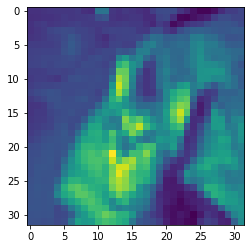

In [36]:
import matplotlib.pyplot as plt
Classes=['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for test_image in testloader:
    print("Label: ",Classes[label[0]])
    image,label = test_image
    plt.imshow(image[0].squeeze(0))
    plt.show()
    
    break

In [41]:
total=0
correct = 0
for test_batch in testloader:
    with torch.no_grad():
        image,label = test_batch
        preds = model(image)
        _, predicted = torch.max(preds.data, 1)
        total += label.size(0)
        correct += (predicted == label).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

/var/folders/gq/c7ch578s2k7_h10mbq482nb00000gp/T/ipykernel_1167/1946341736.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(image)


Accuracy of the network on the 10000 test images: 63 %
